In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import sqlite3
import random 
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
conn = sqlite3.connect('C:\\Users\\jfran\\OneDrive\Desktop\\Baseball Database\\MLB_20002020_database.sqlite')
cur = conn.cursor()

In [5]:
df = pd.read_sql_query("""
SELECT p.nameKey, p.gameKey, p.team,p.opp, p.date, s.attendance, vp.name
FROM "gamelogs.pitching" p
INNER JOIN "gamelogs.schedules" s
ON p.gameKey = s.gameKey
INNER JOIN "players.valuepitching" vp
ON p.nameKey = vp.nameKey
AND p.year = vp.year
AND p.team = vp.team
INNER JOIN (
				SELECT p.nameKey, COUNT(*) AS count_
				FROM "gamelogs.pitching" p
				INNER JOIN "gamelogs.schedules" s
				ON p.gameKey = s.gameKey
				INNER JOIN "players.valuepitching" vp
				ON p.nameKey = vp.nameKey
				AND p.year = vp.year
				AND p.team = vp.team
				WHERE p.basesAtEntry = 'start'
				AND p.year = 2019
                AND p.homeOrAway = 'h'
				GROUP BY p.nameKey
				) sq
ON p.nameKey = sq.nameKey
AND sq.count_ >=10
WHERE p.basesAtEntry = 'start'
AND p.year = 2019
AND p.homeOrAway = 'h'
ORDER BY p.nameKey ASC, p.gameKey ASC
; """, conn)

In [6]:
df

,nameKey,gameKey,team,opp,date,attendance,name
0,alcansa01,20190331MIACOL0,MIA,COL,2019-03-31,7559,Sandy Alcantara
1,alcansa01,20190412MIAPHI0,MIA,PHI,2019-04-12,9322,Sandy Alcantara
2,alcansa01,20190417MIACHC0,MIA,CHC,2019-04-17,10247,Sandy Alcantara
3,alcansa01,20190430MIACLE0,MIA,CLE,2019-04-30,7247,Sandy Alcantara
4,alcansa01,20190519MIANYM0,MIA,NYM,2019-05-19,15983,Sandy Alcantara
...,...,...,...,...,...,...,...
1561,zimmejo02,20190828DETCLE0,DET,CLE,2019-08-28,15834,Jordan Zimmermann
1562,zimmejo02,20190902DETMIN0,DET,MIN,2019-09-02,14614,Jordan Zimmermann
1563,zimmejo02,20190913DETBAL0,DET,BAL,2019-09-13,14722,Jordan Zimmermann
1564,zimmejo02,20190920DETCHW0,DET,CHW,2019-09-20,15265,Jordan Zimmermann


In [7]:
nameKeys_unique = list(set(df.nameKey))

In [8]:
random.choices(nameKeys_unique)[0]

'lopezre01'

In [17]:
def plot_attendance(df,namekey):
    plt.figure(figsize=(10,7))

    data = df[df['nameKey']==namekey].reset_index()
    data['att_index'] = 100*data['attendance']/data['attendance'].iloc[0]
    ymax = data['attendance'].max()
    ymin = data['attendance'].min()
    ymax_index = data['att_index'].max()
    ymin_index = data['att_index'].min()
    
    plt.scatter(x=data.date, y = data.att_index)
    plt.plot(data.date, data.att_index)
    plt.title(namekey)
    plt.xticks(data.date,data.opp,rotation = 60)
    plt.yticks(np.linspace(ymin_index, ymax_index, 5),np.linspace(ymin, ymax, 5))
    plt.show()


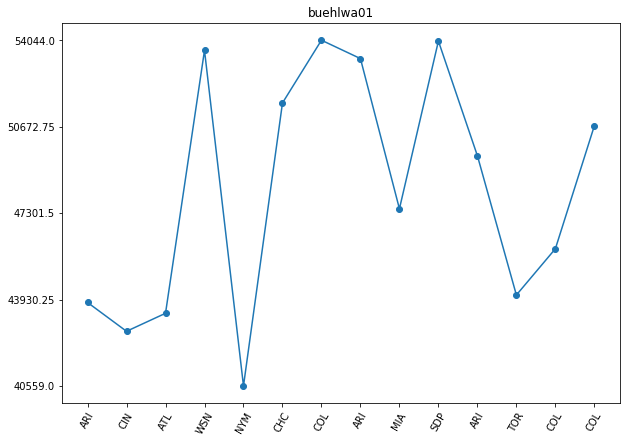

In [18]:
namekey = random.choices(nameKeys_unique)[0]
plot_attendance(df,namekey)

In [19]:
def regresss(df,namekey):
    plt.figure(figsize=(12,7))

    data = df[df['nameKey']==namekey].reset_index()
    firstGameAttendance = data['attendance'].iloc[0]
    data['att_index'] = 100*data['attendance']/firstGameAttendance
    ymax = data['attendance'].max()
    ymin = data['attendance'].min()
    ymax_index = data['att_index'].max()
    ymin_index = data['att_index'].min()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,1+len(data.att_index)), data.att_index)
    
    plt.scatter(x=data.date, y = data.att_index)
    plt.plot(data.date, intercept + slope*np.arange(1,1+len(data.att_index)), 'r', label='fitted line')
    plt.title(namekey)
    plt.xticks(data.date,data.opp,rotation = 60)
    plt.yticks(np.linspace(ymin_index, ymax_index, 5),np.linspace(ymin, ymax, 5))
    plt.show();
    
    print('slope',slope)
    print('intercept',intercept)
    print('r_value',r_value)
    print('p_value',p_value)
    print('std_err',std_err)
    
    for game in np.arange(1,1+len(data.att_index)):
        print('attendance at game', game,':', (intercept + slope*game)*firstGameAttendance/100)

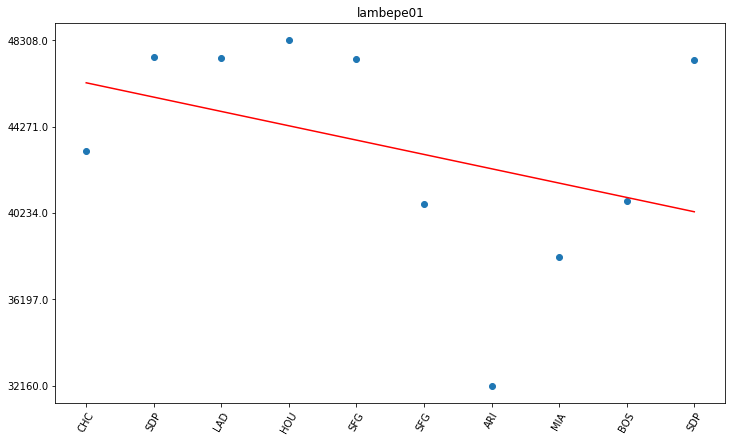

slope -1.5517461870010218
intercept 108.94015984170416
r_value -0.3790508907826137
p_value 0.28004247578383273
std_err 1.3393569098504843
attendance at game 1 : 46312.32727272728
attendance at game 2 : 45643.12121212121
attendance at game 3 : 44973.91515151515
attendance at game 4 : 44304.70909090909
attendance at game 5 : 43635.503030303036
attendance at game 6 : 42966.296969696974
attendance at game 7 : 42297.09090909091
attendance at game 8 : 41627.88484848485
attendance at game 9 : 40958.67878787879
attendance at game 10 : 40289.472727272725


In [20]:
namekey = random.choices(nameKeys_unique)[0]
regresss(df,namekey)

In [13]:
def find_slope(col):

    data = df[df['nameKey']==col].reset_index()
    firstGameAttendance = data['attendance'].iloc[0]
    data['att_index'] = 100*data['attendance']/firstGameAttendance
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,1+len(data.att_index)), data.att_index)
    
    return slope
    

In [14]:
df['slope'] = df['nameKey'].apply(find_slope) 

In [15]:
result = df.drop_duplicates(subset=['name', 'slope'])

In [16]:
result.sort_values("slope", ascending=False)

,nameKey,gameKey,team,opp,date,attendance,name,slope
67,bassich01,20190422OAKTEX0,OAK,TEX,2019-04-22,8073,Chris Bassitt,28.110312
1144,richatr01,20190329MIACOL0,MIA,COL,2019-03-29,6503,Trevor Richards,17.216061
1061,pinedmi01,20190331MINCLE0,MIN,CLE,2019-03-31,15613,Michael Pineda,11.226662
1131,rayro02,20190410ARITEX0,ARI,TEX,2019-04-10,15871,Robbie Ray,9.474811
529,greinza01,20190409ARITEX0,ARI,TEX,2019-04-09,16620,Zack Greinke,8.259605
...,...,...,...,...,...,...,...,...
349,duffyda01,20190426KCRLAA0,KCR,LAA,2019-04-26,23186,Danny Duffy,-1.812414
244,clevimi01,20190401CLECHW0,CLE,CHW,2019-04-01,34519,Mike Clevinger,-1.974916
192,cannigr01,20190430LAATOR0,LAA,TOR,2019-04-30,38797,Griffin Canning,-2.431506
363,eflinza01,20190407PHIMIN0,PHI,MIN,2019-04-07,39735,Zach Eflin,-2.774134


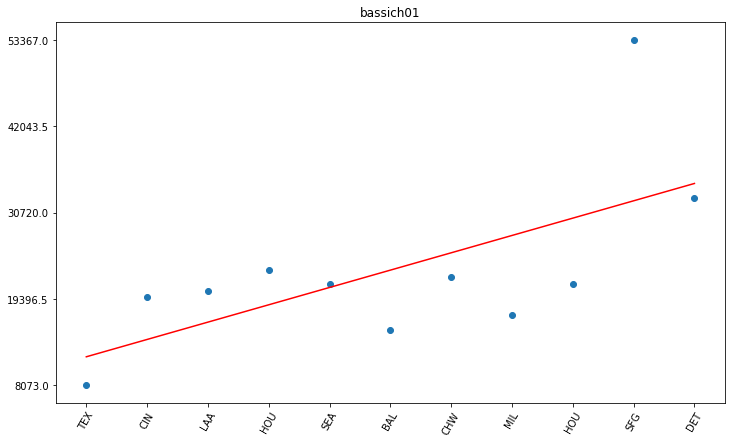

slope 28.11031158857246
intercept 118.46694368433498
r_value 0.6473497329712629
p_value 0.031298543022573885
std_err 11.03241131683941
attendance at game 1 : 11833.181818181818
attendance at game 2 : 14102.527272727273
attendance at game 3 : 16371.872727272726
attendance at game 4 : 18641.21818181818
attendance at game 5 : 20910.563636363637
attendance at game 6 : 23179.909090909092
attendance at game 7 : 25449.25454545454
attendance at game 8 : 27718.6
attendance at game 9 : 29987.945454545454
attendance at game 10 : 32257.29090909091
attendance at game 11 : 34526.63636363637


In [21]:
regresss(df,'bassich01')

In [30]:
np.linspace(1200,4000,5)

array([1200., 1900., 2600., 3300., 4000.])

In [72]:
df[df['name']=='Clayton Kershaw']

,nameKey,gameKey,team,opp,date,attendance,name,slope
658,kershcl01,20190415LADCIN0,LAD,CIN,2019-04-15,52974,Clayton Kershaw,0.544868
659,kershcl01,20190427LADPIT0,LAD,PIT,2019-04-27,47877,Clayton Kershaw,0.544868
660,kershcl01,20190508LADATL0,LAD,ATL,2019-05-08,53707,Clayton Kershaw,0.544868
661,kershcl01,20190514LADSDP0,LAD,SDP,2019-05-14,46460,Clayton Kershaw,0.544868
662,kershcl01,20190527LADNYM0,LAD,NYM,2019-05-27,47816,Clayton Kershaw,0.544868
663,kershcl01,20190601LADPHI0,LAD,PHI,2019-06-01,53507,Clayton Kershaw,0.544868
664,kershcl01,20190613LADCHC0,LAD,CHC,2019-06-13,44970,Clayton Kershaw,0.544868
665,kershcl01,20190618LADSFG0,LAD,SFG,2019-06-18,48219,Clayton Kershaw,0.544868
666,kershcl01,20190705LADSDP0,LAD,SDP,2019-07-05,49790,Clayton Kershaw,0.544868
667,kershcl01,20190720LADMIA0,LAD,MIA,2019-07-20,53778,Clayton Kershaw,0.544868


In [77]:
df.groupby(['name', 'team']).agg({'attendance':'mean'}).sort_values('attendance', ascending=False)

,,attendance
name,team,
Clayton Kershaw,LAD,51139.250000
Hyun-Jin Ryu,LAD,49490.071429
Kenta Maeda,LAD,48491.000000
Walker Buehler,LAD,48200.714286
Dakota Hudson,STL,43588.529412
...,...,...
Ryne Stanek,TBR,14555.846154
Sandy Alcantara,MIA,10920.933333
Pablo Lopez,MIA,10162.181818
